# **Programa Especializado en Credit Scoring con Python**
<img src="../../figuras/logo.png" width="200"/>

## 📊 **Sesión 1: Introducción al Credit Scoring en Banca**

**Docente**: Enzo Infantes Zúñiga  
**Contacto**: <enzo.infantes28@gmail.com>  
**LinkedIn**: [enzo-infantes](https://www.linkedin.com/in/enzo-infantes/)

# **0. Initial Settings**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
import os

absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
data_path = os.path.join(absolute_path, "data", "s01")

# **1. Cargando Data**

In [22]:
df = pd.read_csv(os.path.join(data_path, "credit_data.csv"))

In [20]:
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


array([[<Axes: title={'center': 'clientid'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'default'}>, <Axes: >]], dtype=object)

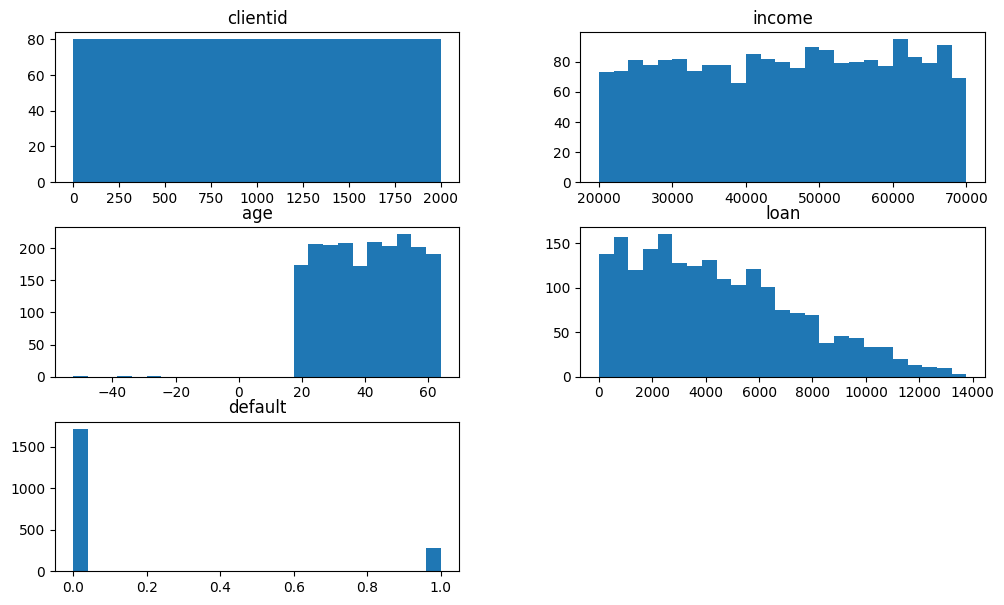

In [16]:
df.hist(bins=25, figsize=(12,7), grid=False)

# **3. Simulación Scoring**

Modelo Logístico:
$$
\ln\left(\frac{p_i}{1-p_i}\right) = PD_{logit} = \beta_0 
         + \beta_1 ingreso
         + \beta_2 age
         + \beta_3 loan = X_i\beta
$$

Para hallar la Probabilidad de Default:
$$
p_i = \frac{1}{1 + e^{-X_i\beta}}
$$

A modo de simplificar el análisis se eliminan las filas con valores nulos en alguna de las columnas.

In [41]:
df.dropna(inplace=True)
X = df[["income", "age", "loan"]]
y = df["default"]

model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## **3.1. Predicciones del Modelo**:
- $y_{hat}$: Es el valor predicho de la variable dependiente (default)
- $probabilities$: Es la probabilidad de que default sea 1 según el modelo Logístico

In [42]:
y_hat = model.predict(X)
probabilities = model.predict_proba(X)[:,1]

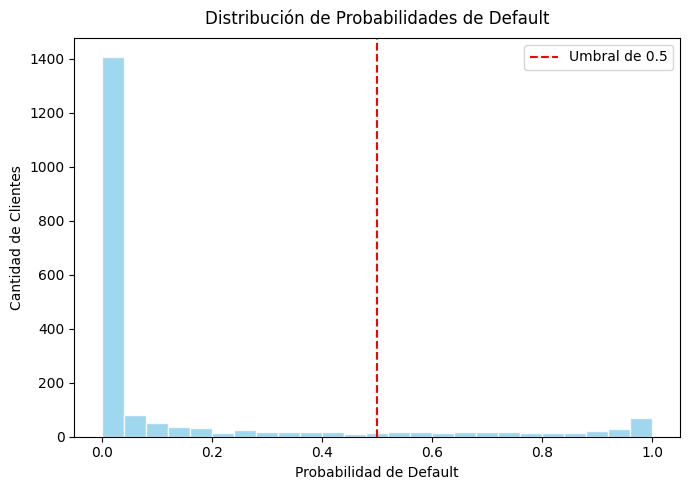

In [52]:
plt.figure(figsize=(7, 5))
plt.hist(probabilities, bins=25, color='skyblue', edgecolor='white', alpha=0.8)
plt.title("Distribución de Probabilidades de Default", pad=10)
plt.xlabel("Probabilidad de Default")
plt.ylabel("Cantidad de Clientes")
plt.axvline(x=0.5, color='red', linestyle='--', label='Umbral de 0.5')
plt.legend()
plt.tight_layout()
plt.show()

Text(45.72222222222221, 0.5, 'Realidad')

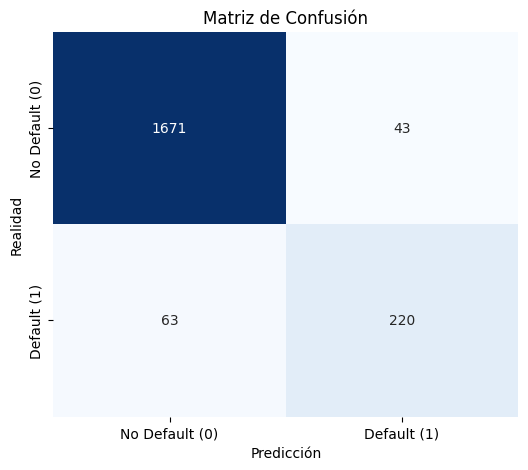

In [54]:
# 2. Matriz de Confusión
cm = confusion_matrix(y, y_hat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')